In [1]:
%pip install pycaret
%pip install shap

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 13.9MB 235kB/s 
     |████████████████████████████████| 266kB 37.3MB/s 
     |████████████████████████████████| 1.8MB 17.7MB/s 
     |████████████████████████████████| 174kB 21.6MB/s 
     |████████████████████████████████| 102kB 4.7MB/s 
     |████████████████████████████████| 66.1MB 54kB/s 
     |████████████████████████████████| 266kB 31.9MB/s 
     |████████████████████████████████| 1.6MB 26.2MB/s 
     |████████████████████████████████| 6.8MB 34.6MB/s 
     |████████████████████████████████| 1.1MB 34.4MB/s 
     |████████████████████████████████| 153kB 35.7MB/s 
     |████████████████████████████████| 163kB 32.0MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 6.0MB 31.3MB/s 
     |████████████████████████████████| 327kB 40.8MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 2.1MB 39.5MB/s 

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456465 sha256=33169987cbf7d50f0a3ac1c0604865af22a99ccce6e101d9413401dee96ac924
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.classification import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

In [4]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_order','first_order_dt','order_dt','first_cont_dt','tot_contribution_paid_amt','days_to_donation', 'Lifetime Giving'], axis=1)
df.head()

,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,prospect_board,first_cont_after,rolling_tkt_sum,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
0,111,0.262550,1,5,0.104660,0,0,0.067821,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,111,0.280947,1,5,0.104660,0,0,0.162745,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,111,0.170287,1,5,0.104660,0,0,0.189150,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,258,0.290096,5,6,0.014668,0,0,0.093029,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,262,0.110229,2,4,-0.058711,0,0,0.065087,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [5]:
setup(
    df, 
    target = 'first_cont_after',
    train_size = 0.8,
    fix_imbalance = True,
    create_clusters = True,
    numeric_features = ['geo_area_desc','Prelim Capacity']
)

Setup Succesfully Completed!


,Description,Value
0,session_id,4494
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(70372, 34)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(        owner_no  tot_ticket_paid_amt  ...  data_cluster_16  data_cluster_17
 0          111.0             0.262550  ...              0.0              0.0
 1          111.0             0.280947  ...              0.0              0.0
 2          111.0             0.170287  ...              0.0              0.0
 3          258.0             0.290096  ...              0.0              0.0
 4          262.0             0.110229  ...              0.0              0.0
 ...          ...                  ...  ...              ...              ...
 70367  2419011.0            -0.720197  ...              0.0              0.0
 70368  2419126.0            -0.720197  ...              0.0              0.0
 70369  2419248.0             0.420163  ...              0.0              0.0
 70370  2419278.0             0.405498  ...              0.0              0.0
 70371  2419301.0             0.243553  ...              0.0              0.0
 
 [70372 rows x 78 columns], 0        0
 1        0
 2        0

In [6]:
model = compare_models(verbose=True, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,K Neighbors Classifier,0.9031,0.9554,0.9019,0.5948,0.7167,0.6613,0.6822,1.8333
1,CatBoost Classifier,0.9258,0.9248,0.6241,0.7854,0.6953,0.6537,0.6594,65.4760
2,Extra Trees Classifier,0.9127,0.9112,0.5512,0.7400,0.6316,0.5832,0.5915,18.2539
3,Decision Tree Classifier,0.8918,0.7968,0.6665,0.5901,0.6258,0.5628,0.5644,1.8219
4,Light Gradient Boosting Machine,0.9045,0.9046,0.5837,0.6707,0.6241,0.5697,0.5716,2.5085
5,Random Forest Classifier,0.9108,0.8901,0.5440,0.7307,0.6235,0.5742,0.5823,1.4059
6,Extreme Gradient Boosting,0.8729,0.8754,0.6015,0.5283,0.5625,0.4885,0.4899,14.4683
7,Gradient Boosting Classifier,0.8716,0.8748,0.6018,0.5238,0.5599,0.4852,0.4869,39.6456
8,Ada Boost Classifier,0.8555,0.8529,0.6074,0.4752,0.5329,0.4490,0.4539,9.5936
9,Ridge Classifier,0.7642,0.0000,0.7483,0.3352,0.4629,0.3390,0.3839,0.1868


In [7]:
model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9440,0.9636,0.9280,0.7317,0.8182,0.7857,0.7935
1,0.9389,0.9600,0.9359,0.7079,0.8061,0.7706,0.7812
2,0.9375,0.9503,0.9136,0.7093,0.7986,0.7623,0.7709
3,0.9417,0.9582,0.9294,0.7218,0.8126,0.7787,0.7874
4,0.9378,0.9639,0.9464,0.7009,0.8053,0.7693,0.7816
5,0.9382,0.9614,0.9386,0.7046,0.8049,0.7691,0.7803
6,0.9368,0.9521,0.9294,0.7019,0.7998,0.7631,0.7737
7,0.9343,0.9609,0.9306,0.6916,0.7935,0.7554,0.7672
8,0.9373,0.9553,0.9228,0.7057,0.7998,0.7634,0.7730
9,0.9314,0.9563,0.9280,0.6817,0.7860,0.7463,0.7589


In [8]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.94,0.9598,0.932,0.7138,0.8084,0.7736,0.7833


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0,channel_desc_Walk Up_1,MOS_desc_External_0,MOS_desc_External_1,MOS_desc_Internal_0,MOS_desc_Internal_1,MOS_desc_Ticketing_0,MOS_desc_Ticketing_1,...,delivery_desc_Digital_1,delivery_desc_Do Not Print Tickets_0,delivery_desc_Do Not Print Tickets_1,delivery_desc_Mail_0,delivery_desc_Mail_1,delivery_desc_Will Call_0,delivery_desc_Will Call_1,facility_desc_Academy of Music_0,facility_desc_Academy of Music_1,facility_desc_Fundraiser_0,facility_desc_Fundraiser_1,facility_desc_Independence Mall_0,facility_desc_Independence Mall_1,facility_desc_Other_0,facility_desc_Other_1,facility_desc_Perelman_0,facility_desc_Perelman_1,facility_desc_Small venue_0,facility_desc_Small venue_1,data_cluster_0,data_cluster_1,data_cluster_2,data_cluster_3,data_cluster_4,data_cluster_5,data_cluster_6,data_cluster_7,data_cluster_8,data_cluster_9,data_cluster_10,data_cluster_11,data_cluster_12,data_cluster_13,data_cluster_14,data_cluster_15,data_cluster_16,data_cluster_17,first_cont_after,Label,Score
0,2197600.0,-0.720197,4.0,5.0,0.364235,0.564648,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0000
1,2404125.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0000
2,2168112.0,0.480926,1.0,5.0,0.422969,0.649819,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1.0000
3,2379773.0,0.119002,1.0,0.0,0.199453,0.278559,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0000
4,1711943.0,0.310935,1.0,0.0,0.208406,0.112098,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,461335.0,0.242415,1.0,1.0,0.276087,0.049395,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0

In [9]:
save_model(model, 'PyCaret on Target 2', verbose=True)

Transformation Pipeline and Model Succesfully Saved


In [10]:
model2 = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9290,0.9258,0.6257,0.8074,0.7050,0.6654,0.6724
1,0.9256,0.9316,0.6531,0.7642,0.7043,0.6620,0.6647
2,0.9242,0.9264,0.5969,0.7930,0.6811,0.6390,0.6474
3,0.9277,0.9267,0.6353,0.7915,0.7049,0.6642,0.6694
4,0.9325,0.9262,0.6588,0.8090,0.7262,0.6882,0.6929
5,0.9288,0.9282,0.6353,0.7993,0.7079,0.6680,0.6737
6,0.9242,0.9223,0.6327,0.7683,0.6939,0.6511,0.6551
7,0.9209,0.9177,0.6126,0.7585,0.6778,0.6333,0.6380
8,0.9215,0.9145,0.5942,0.7747,0.6726,0.6289,0.6360
9,0.9234,0.9282,0.5969,0.7876,0.6791,0.6365,0.6444


In [11]:
model2 = tune_model(model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9393,0.9386,0.6728,0.8482,0.7504,0.7163,0.7225
1,0.9410,0.9436,0.7055,0.8344,0.7645,0.7311,0.7345
2,0.9393,0.9413,0.6623,0.8576,0.7474,0.7135,0.7212
3,0.9439,0.9332,0.6889,0.8711,0.7693,0.7379,0.7445
4,0.9412,0.9400,0.7072,0.8349,0.7657,0.7324,0.7357
5,0.9398,0.9401,0.6876,0.8403,0.7563,0.7223,0.7271
6,0.9391,0.9372,0.6889,0.8339,0.7545,0.7201,0.7243
7,0.9330,0.9269,0.6545,0.8157,0.7262,0.6886,0.6940
8,0.9341,0.9262,0.6558,0.8227,0.7298,0.6928,0.6986
9,0.9401,0.9398,0.6806,0.8483,0.7553,0.7216,0.7273


In [12]:
predict_model(model2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9431,0.9443,0.7012,0.8535,0.7699,0.7378,0.7424


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0,channel_desc_Walk Up_1,MOS_desc_External_0,MOS_desc_External_1,MOS_desc_Internal_0,MOS_desc_Internal_1,MOS_desc_Ticketing_0,MOS_desc_Ticketing_1,...,delivery_desc_Digital_1,delivery_desc_Do Not Print Tickets_0,delivery_desc_Do Not Print Tickets_1,delivery_desc_Mail_0,delivery_desc_Mail_1,delivery_desc_Will Call_0,delivery_desc_Will Call_1,facility_desc_Academy of Music_0,facility_desc_Academy of Music_1,facility_desc_Fundraiser_0,facility_desc_Fundraiser_1,facility_desc_Independence Mall_0,facility_desc_Independence Mall_1,facility_desc_Other_0,facility_desc_Other_1,facility_desc_Perelman_0,facility_desc_Perelman_1,facility_desc_Small venue_0,facility_desc_Small venue_1,data_cluster_0,data_cluster_1,data_cluster_2,data_cluster_3,data_cluster_4,data_cluster_5,data_cluster_6,data_cluster_7,data_cluster_8,data_cluster_9,data_cluster_10,data_cluster_11,data_cluster_12,data_cluster_13,data_cluster_14,data_cluster_15,data_cluster_16,data_cluster_17,first_cont_after,Label,Score
0,2197600.0,-0.720197,4.0,5.0,0.364235,0.564648,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.3909
1,2404125.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0054
2,2168112.0,0.480926,1.0,5.0,0.422969,0.649819,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9428
3,2379773.0,0.119002,1.0,0.0,0.199453,0.278559,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0353
4,1711943.0,0.310935,1.0,0.0,0.208406,0.112098,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,461335.0,0.242415,1.0,1.0,0.276087,0.049395,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0

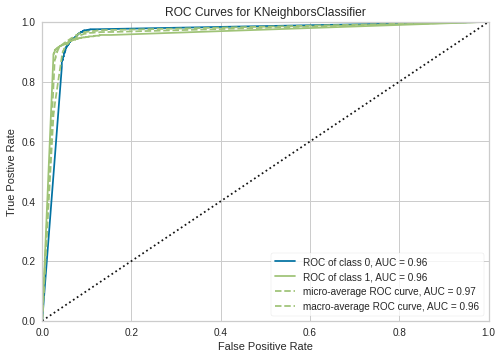

In [13]:
plot_model(model, plot='auc', save=True, verbose=True)

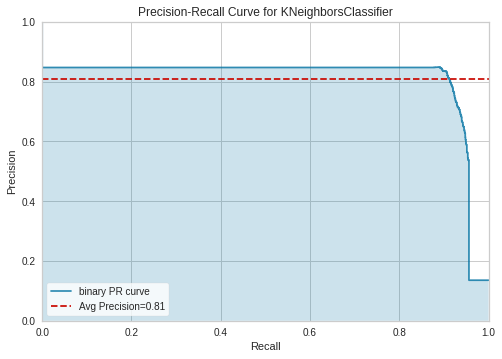

In [14]:
plot_model(model, plot='pr', save=True, verbose=True)

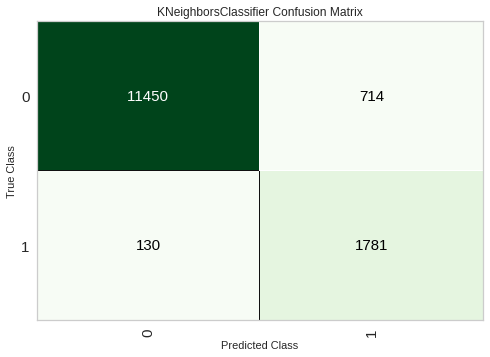

In [15]:
plot_model(model, plot='confusion_matrix', save=True, verbose=True)

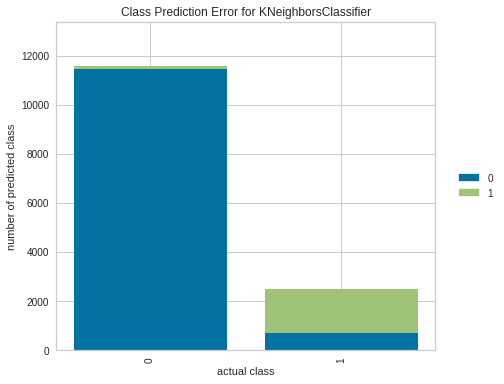

In [16]:
plot_model(model, plot='error', save=True, verbose=True)

In [17]:
plot_model(model, plot='parameter', save=True, verbose=True)

,Parameters
algorithm,auto
leaf_size,30
metric,manhattan
metric_params,None
n_jobs,-1
n_neighbors,3
p,2
weights,distance


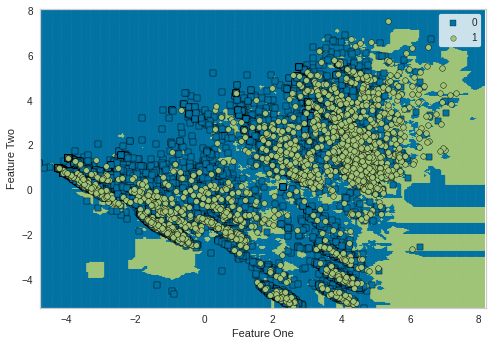

In [19]:
plot_model(model, plot='boundary', save=True, verbose=True)

In [ ]:
plot_model(model, plot='vc', save=True, verbose=True)

IntProgress(value=0, description='Processing: ', max=5)

In [ ]:
interpret_model(model, plot = 'correlation')

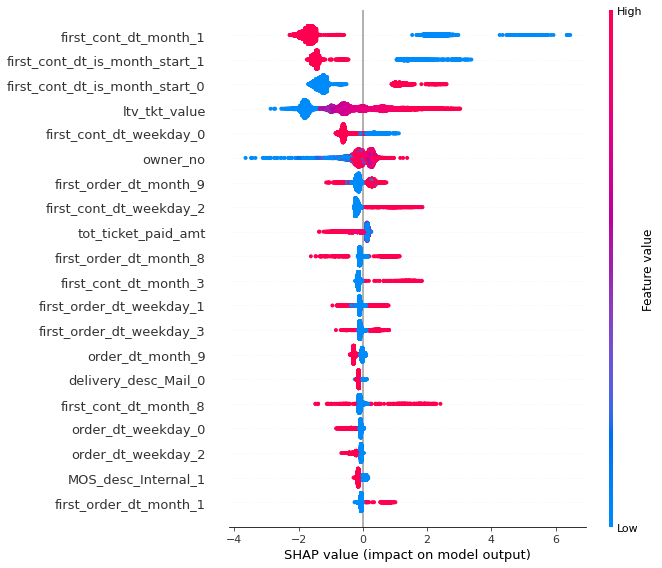

In [ ]:
interpret_model(model, plot = 'summary')

In [ ]:
interpret_model(model, plot = 'reason')